# 2nd Task
## Stock Market Predicton using Numerical and Textual Analysis

## Define Problem
Stock Market Predictions based on Stock data of Dow Jones and the news headlines for the past 20 years. Stock prices of companies usually has a high impact depending on the things happening around the country. The idea is to use a company’s stock prices and the corresponding news headlines for 15 years and build a model which predicts the stock prices.

## Numerical Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error , mean_absolute_error 
from sklearn.preprocessing import MinMaxScaler

In [2]:
# We will analyze the last 15 years stock price data of IWM
df_num = pd.read_csv('IWM.csv')
df_num.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2005-01-03,65.095001,65.209999,63.570000,63.910000,50.853107,16062600
1,2005-01-04,64.035004,64.084999,62.430000,62.540001,49.762993,27450000
2,2005-01-05,62.470001,62.639999,61.290001,61.290001,48.768360,29884200
3,2005-01-06,61.669998,62.200001,61.224998,61.615002,49.026966,23061200
4,2005-01-07,61.755001,61.950001,60.895000,60.930000,48.481922,20906200


In [3]:
df_num.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
4022,2020-12-23,198.570007,199.649994,197.899994,199.139999,197.269363,18392000
4023,2020-12-24,199.929993,199.940002,198.059998,199.009995,197.140594,8904900
4024,2020-12-28,201.160004,201.179993,198.130005,198.270004,196.407562,27168400
4025,2020-12-29,198.639999,199.000000,193.440002,194.429993,192.603607,33901300
4026,2020-12-30,195.050003,197.479996,195.029999,196.410004,194.565018,20595700


In [4]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4027 entries, 0 to 4026
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4027 non-null   object 
 1   Open       4027 non-null   float64
 2   High       4027 non-null   float64
 3   Low        4027 non-null   float64
 4   Close      4027 non-null   float64
 5   Adj Close  4027 non-null   float64
 6   Volume     4027 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 220.4+ KB


In [5]:
df_num['Date'] = pd.to_datetime(df_num['Date'])

In [6]:
df_num.set_index('Date',inplace=True,drop=False)

In [7]:
df_num.dropna(inplace=True)
df_num.head()

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2005-01-03,2005-01-03,65.095001,65.209999,63.570000,63.910000,50.853107,16062600
2005-01-04,2005-01-04,64.035004,64.084999,62.430000,62.540001,49.762993,27450000
2005-01-05,2005-01-05,62.470001,62.639999,61.290001,61.290001,48.768360,29884200
2005-01-06,2005-01-06,61.669998,62.200001,61.224998,61.615002,49.026966,23061200
2005-01-07,2005-01-07,61.755001,61.950001,60.895000,60.930000,48.481922,20906200


In [8]:
df_num.shape

(4027, 7)

In [9]:
df_num.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4027.000000,4027.000000,4027.000000,4027.000000,4027.000000,4.027000e+03
mean,100.937661,101.696523,100.065253,100.926040,91.350681,4.548999e+07
std,35.783976,35.906101,35.629777,35.773671,37.886905,3.051934e+07
min,34.730000,35.639999,34.259998,34.389999,28.755594,1.200000e+03
25%,71.250000,71.944999,70.435001,71.250000,59.072220,2.449420e+07
50%,86.779999,86.959999,86.040001,86.599998,76.912872,3.721970e+07
75%,127.270001,128.290001,125.970001,126.810001,120.786014,5.791915e+07
max,201.160004,201.179993,198.130005,199.139999,197.269363,3.551170e+08


### Using `ARIMA` Model

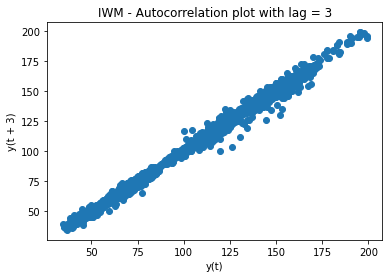

In [10]:
# Checking for Cross-correlation
plt.figure()
pd.plotting.lag_plot(df_num['Close'],lag=3)
plt.title('IWM - Autocorrelation plot with lag = 3')
plt.show()

### There is an auto correlation for lag=3 (i.e the data of current day is correlated to previous 3 days' data)

### Visualize

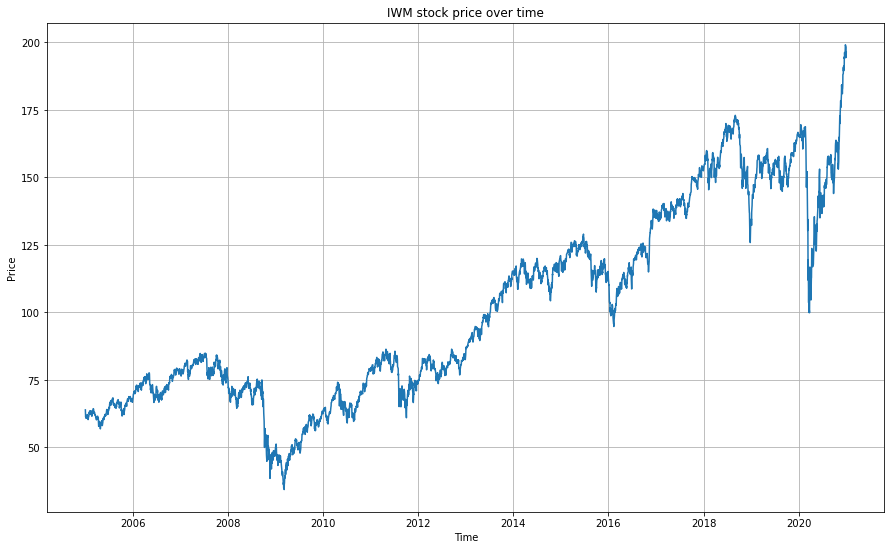

In [11]:
plt.figure(figsize=(15,9))
plt.grid(True)
plt.plot(df_num['Close'])
plt.title('IWM stock price over time')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()

In [12]:
# Split date into train and test
train_data, test_data = df_num[:int(len(df_num)*0.9)], df_num[int(len(df_num)*0.9):]

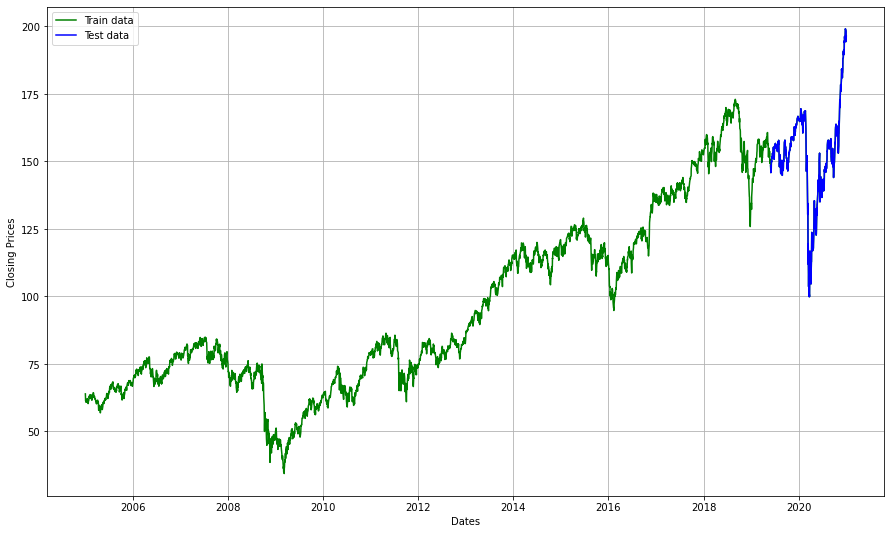

In [13]:
plt.figure(figsize=(15,9))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_num['Close'], 'green', label='Train data')
plt.plot(test_data['Close'], 'blue', label='Test data')
plt.legend()

### `auto_arima` function seeks to identify the most optimal parameters for an `ARIMA` model, and returns a fitted `ARIMA` model. 

In [14]:
AUTO_ARIMA = auto_arima(train_data['Close'], start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(AUTO_ARIMA.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=11511.041, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=11506.589, Time=0.18 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=11506.466, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=11510.486, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=11508.301, Time=0.38 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=11508.226, Time=0.36 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=11510.272, Time=0.65 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=11506.049, Time=0.16 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=11507.907, Time=0.15 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=11507.835, Time=0.19 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=11506.164, Time=0.10 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=11509.894, Time=0.22 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 2.820 seconds
                               SARIMAX Results                              

In [15]:
# Fitting the ARIMA model
model = ARIMA(train_data['Close'], order=(0,1,1))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 3623
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -5750.233
Method:                       css-mle   S.D. of innovations              1.183
Date:                Fri, 11 Feb 2022   AIC                          11506.466
Time:                        07:49:55   BIC                          11525.051
Sample:                             1   HQIC                         11513.087
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0237      0.019      1.259      0.208      -0.013       0.061
ma.L1.D.Close    -0.0430      0.017     -2.569      0.010      -0.076      -0.010
                                    Root

C:\Users\Mohamed Nabil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Mohamed Nabil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


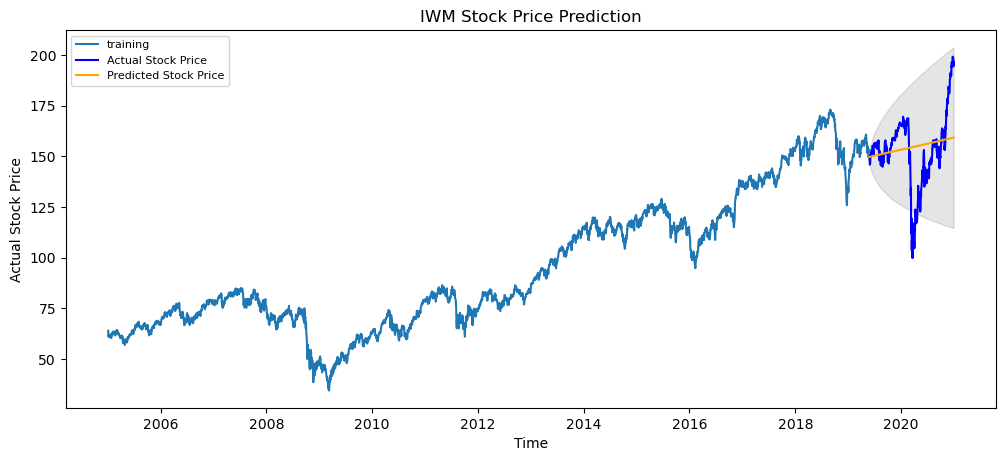

In [16]:
# Forecast
fc, se, conf = fitted.forecast(403, alpha=0.05)  
fc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(conf[:, 0], index=test_data.index)
upper_series = pd.Series(conf[:, 1], index=test_data.index)
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data['Close'], label='training')
plt.plot(test_data['Close'], color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('IWM Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [17]:
# report performance
mse = mean_squared_error(test_data['Close'], fc)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data['Close'], fc)
print('MAE: '+str(mae))
rmse = np.sqrt(mean_squared_error(test_data['Close'], fc))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc - test_data['Close'])/np.abs(test_data['Close']))
print('MAPE: '+str(mape))

MSE: 300.5874281766354
MAE: 12.275014310040616
RMSE: 17.33745737346268
MAPE: 0.08663977185732034


### Around 8.6% `MAPE(Mean Absolute Percentage Error)` implies the model is about 91.4% accurate in predicting the test set observations.

### Using `LSTM` Model

In [18]:
stock = df_num['Close'].copy()
stock = pd.DataFrame(stock)
stock.head()

,Close
Date,
2005-01-03,63.910000
2005-01-04,62.540001
2005-01-05,61.290001
2005-01-06,61.615002
2005-01-07,60.930000


In [19]:
scaler = MinMaxScaler(feature_range=(0,1))
df = scaler.fit_transform(stock)

In [20]:
# Train test split
train_size = int(len(df)*0.8)
test_size = len(df) - train_size
initial_train_data,test_data=df[0:train_size,:],df[train_size:len(df),:1]

print(train_size,test_size,sep='\n')

3221
806


In [21]:
# Validation Data
train_data,cv_data = initial_train_data[0:int(len(initial_train_data)*0.8)],initial_train_data[int(len(initial_train_data)*0.8):]

In [22]:
# Convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [23]:
time_step = 60
Xtrain, ytrain = create_dataset(train_data, time_step)
Xtest, ytest = create_dataset(test_data, time_step)
Xcv,ycv = create_dataset(cv_data, time_step)

print(Xtrain.shape,ytrain.shape,sep='\n')

(2515, 60)
(2515,)


In [24]:
print(Xtest.shape,ytest.shape,sep='\n')

(745, 60)
(745,)


In [25]:
# Reshape input to be [samples, time steps, features] which is required for LSTM
Xtrain =Xtrain.reshape(Xtrain.shape[0],Xtrain.shape[1] , 1)
Xtest = Xtest.reshape(Xtest.shape[0],Xtest.shape[1] , 1)
Xcv = Xcv.reshape(Xcv.shape[0],Xcv.shape[1] , 1)

In [26]:
# Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K
import keras

In [27]:
#Defining our metric
def root_mean_squared_error(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

In [28]:
## LSTM Model Initialization
model = Sequential()
model.add(LSTM(units=128, activation='tanh', kernel_initializer=keras.initializers.glorot_uniform(seed=26), input_shape = (Xtrain.shape[1], 1), unroll = True))
model.add(Dense(1, name="output_layer"))
model.compile(optimizer = Adam(learning_rate=0.01), loss = root_mean_squared_error)

In [29]:
model.fit(Xtrain,ytrain,validation_data=(Xcv,ycv),epochs=100,batch_size=16,verbose=1)

Epoch 1/100
158/158 [==============================] - 11s 32ms/step - loss: 0.0244 - val_loss: 0.0221
Epoch 2/100
158/158 [==============================] - 4s 28ms/step - loss: 0.0112 - val_loss: 0.0205
Epoch 3/100
158/158 [==============================] - 5s 31ms/step - loss: 0.0102 - val_loss: 0.0266
Epoch 4/100
158/158 [==============================] - 4s 27ms/step - loss: 0.0095 - val_loss: 0.0110
Epoch 5/100
158/158 [==============================] - 5s 34ms/step - loss: 0.0089 - val_loss: 0.0079
Epoch 6/100
158/158 [==============================] - 5s 32ms/step - loss: 0.0089 - val_loss: 0.0114
Epoch 7/100
158/158 [==============================] - 5s 30ms/step - loss: 0.0090 - val_loss: 0.0114
Epoch 8/100
158/158 [==============================] - 5s 29ms/step - loss: 0.0084 - val_loss: 0.0127
Epoch 9/100
158/158 [==============================] - 5s 32ms/step - loss: 0.0086 - val_loss: 0.0127
Epoch 10/100
158/158 [==============================] - 5s 33ms/step - loss: 0.00

158/158 [==============================] - 4s 26ms/step - loss: 0.0076 - val_loss: 0.0089
Epoch 81/100
158/158 [==============================] - 5s 29ms/step - loss: 0.0074 - val_loss: 0.0075
Epoch 82/100
158/158 [==============================] - 4s 27ms/step - loss: 0.0077 - val_loss: 0.0166
Epoch 83/100
158/158 [==============================] - 4s 26ms/step - loss: 0.0073 - val_loss: 0.0076
Epoch 84/100
158/158 [==============================] - 4s 26ms/step - loss: 0.0071 - val_loss: 0.0108
Epoch 85/100
158/158 [==============================] - 4s 26ms/step - loss: 0.0077 - val_loss: 0.0157
Epoch 86/100
158/158 [==============================] - 4s 27ms/step - loss: 0.0075 - val_loss: 0.0107
Epoch 87/100
158/158 [==============================] - 5s 33ms/step - loss: 0.0072 - val_loss: 0.0075
Epoch 88/100
158/158 [==============================] - 5s 29ms/step - loss: 0.0071 - val_loss: 0.0179
Epoch 89/100
158/158 [==============================] - 4s 26ms/step - loss: 0.0076 - 

In [30]:
# Prediction and check performance metrics
train_predict=model.predict(Xtrain)
test_predict=model.predict(Xtest)

# Transform back to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

rescaled_ytrain = scaler.inverse_transform(ytrain.reshape(-1, 1))
rescaled_ytest = scaler.inverse_transform(ytest.reshape(-1, 1))

In [31]:
# Calculate RMSE performance metrics
np.sqrt(mean_squared_error(rescaled_ytrain,train_predict))

1.2472211168624205

In [32]:
# report performance
mse = mean_squared_error(rescaled_ytest,test_predict)
print('MSE: '+str(mse))
mae = mean_absolute_error(rescaled_ytest,test_predict)
print('MAE: '+str(mae))
rmse = np.sqrt(mean_squared_error(rescaled_ytest,test_predict))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(test_predict - rescaled_ytest)/np.abs(rescaled_ytest))
print('MAPE: '+str(mape))

MSE: 5.692085485017679
MAE: 1.6589642485836567
RMSE: 2.385809188727732
MAPE: 0.011297092230640064


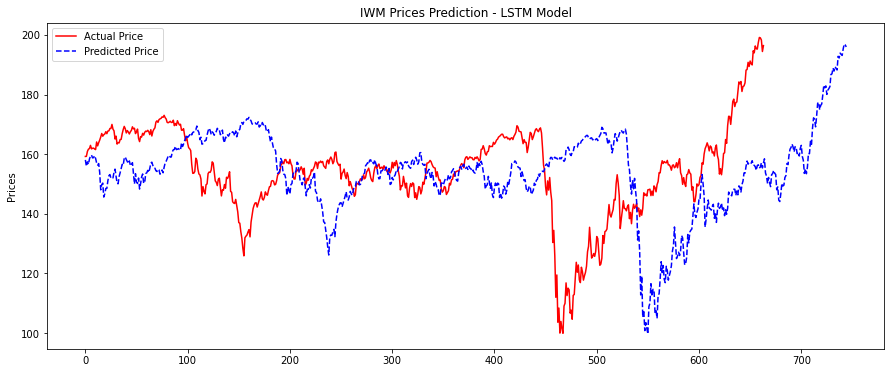

In [33]:
plt.figure(figsize=(15,6))
plt.plot(scaler.inverse_transform(df[3363:,]),color='red', label='Actual Price')
plt.plot(test_predict, color='blue', linestyle='dashed',label='Predicted Price')
plt.title('IWM Prices Prediction - LSTM Model')
plt.ylabel('Prices')
plt.legend()
plt.show()

## Observations:
It seems that there has been a great fall in stock market price in the time period of March 2020 - May 2020. This is mainly due to lockdown in `March 2020` due to COVID-19. So we will target the time period of `30-06-2019 to 29-06-2020` in this task. So, the prediction models results in error during this time period.

## Text Data Analysis

In [34]:
import string
import re
import nltk
from textblob import TextBlob

In [35]:
df_text = pd.read_csv('india-news-headlines.csv')
df_text.head()

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic


In [36]:
# Handle the date format
df_text['publish_date'] = pd.to_datetime(df_text['publish_date'],format='%Y%m%d')
df_text.head()

,publish_date,headline_category,headline_text
0,2001-01-02,unknown,Status quo will not be disturbed at Ayodhya; s...
1,2001-01-02,unknown,Fissures in Hurriyat over Pak visit
2,2001-01-02,unknown,America's unwanted heading for India?
3,2001-01-02,unknown,For bigwigs; it is destination Goa
4,2001-01-02,unknown,Extra buses to clear tourist traffic


In [37]:
df_text.tail()

,publish_date,headline_category,headline_text
3424062,2020-12-31,city.jodhpur,Covid-19: Despite dip in cases; Rajasthan amon...
3424063,2020-12-31,city.udaipur,Covid-19: Despite dip in cases; Rajasthan amon...
3424064,2020-12-31,city.ajmer,Covid-19: Despite dip in cases; Rajasthan amon...
3424065,2020-12-31,removed,Govt extends deadline for use of FASTag till F...
3424066,2020-12-31,entertainment.bengali.movies.news,Celebs plan to party safely and responsibly on...


### Since, we only have the the numerical data between `2005-01-03 to 2020-12-30`, we will only use the text data generated during these dates

In [38]:
text = df_text[df_text['publish_date'] >= '2005-01-03'].reset_index(drop=True)

In [39]:
text.shape

(3085222, 3)

### Since, we are doing a stock price prediction, we only need data related to `business`

In [40]:
text['headline_category'].value_counts().index

Index(['india', 'unknown', 'city.mumbai', 'city.delhi',
       'business.india-business', 'city.chandigarh',
       'entertainment.hindi.bollywood', 'city.hyderabad', 'city.nagpur',
       'city.goa',
       ...
       'best-products.home-decor-and-garden.living-room-decor',
       'health-case-studies', 'sports.tennis.top-stories.tennis-atp',
       'elections.assembly-elections.goa',
       '2013-the-year-sachin-bids-adieu.tennis-2013', 'talk-radio',
       'sports.new-zealand-in-india-2016.interviews', 'recipes',
       'ahmedabad-events', 'war-on-iraq.news'],
      dtype='object', length=978)

In [41]:
business = [x for x in text['headline_category'].value_counts().index if 'business' in x]

In [42]:
business

['business.india-business',
 'business.international-business',
 'business.personal-finance',
 'business',
 'india-business-news-wire',
 'business.faqs.income-tax-faqs',
 'business.mf-simplified.mf-news',
 'business.mf-simplified.jargon-busters.debt',
 'business.faqs.aadhar-faqs',
 'business.mf-simplified.jargon-busters.equity',
 'business.mf-simplified.faq',
 'business.faqs.gst-faqs']

In [43]:
text = text.loc[text['headline_category'].str.find('business') !=-1].reset_index(drop=True)
text.head()

,publish_date,headline_category,headline_text
0,2005-01-03,business.india-business,Anil Ambani resigns from IPCL
1,2005-01-03,business.india-business,Idea tapping the rural potential
2,2005-01-03,business.india-business,Sensex closes at new high of 6;679
3,2005-01-03,business.india-business,Separate prescriptions for private; public firms
4,2005-01-03,business.india-business,Tsunami not to hit growth: World Bank


### Joining the rows of the same date 

In [44]:
text = text.groupby('publish_date').agg({'headline_category':'first','headline_text': '. '.join}).reset_index()
text.head()

,publish_date,headline_category,headline_text
0,2005-01-03,business.india-business,Anil Ambani resigns from IPCL. Idea tapping th...
1,2005-01-04,business.india-business,Sensex will breach 7000-level in 2005. Major c...
2,2005-01-05,business.india-business,Aiyar for an end to 1-year oil contracts. Indi...
3,2005-01-06,business.india-business,ADC slashed; cell tariffs to fall. Govt's help...
4,2005-01-07,business.india-business,Ambanis headed for split: Report. Dividing Rel...


In [45]:
text['headline_text'] = text['headline_text'].str.lower()

count = 0
for txt in text['headline_text']:
    if 'bse' in txt or 'sensex' in txt :
        count+=1

count

3465

### `Sensex` or `BSE` occurs 3396 times in the whole dataset

In [46]:
from nltk import sent_tokenize

def actual_news(data):
    for index in data.index:
        sentences = sent_tokenize(data['headline_text'][index])
        relevant_line = ' '.join(sent for sent in sentences if 'sensex' in sent or 'bse' in sent)
        if len(relevant_line)>5:
            data['headline_text'][index] =relevant_line
    return data

text2 = actual_news(text)

In [47]:
text2.head()

,publish_date,headline_category,headline_text
0,2005-01-03,business.india-business,sensex closes at new high of 6;679. separate p...
1,2005-01-04,business.india-business,sensex will breach 7000-level in 2005. major c...
2,2005-01-05,business.india-business,low support from fii led to sensex crash
3,2005-01-06,business.india-business,adc slashed; cell tariffs to fall. govt's help...
4,2005-01-07,business.india-business,may 17 sensex crash: fm for revealing names; s...


In [48]:
# Cleaning the text
from nltk import word_tokenize

def clean_txt(text):
    # Removing non alphanumeric text
    text = re.sub('[^a-zA-Z]',' ',text)
    return text

text['headline_text'] = text['headline_text'].apply(clean_txt)

###  Sentiment Analysis of News Headlines

In [49]:
def getAnalysis_polarity(headline):
    result = TextBlob(headline)
    
    if result.sentiment.polarity < 0:
        return 'negative'
    elif result.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'positive'

text2['Result'] = np.array([getAnalysis_polarity(headline) for headline in text2['headline_text']])

final_result = text2.groupby(['Result']).agg({'headline_text':'count'})
final_result

,headline_text
Result,
negative,1680
neutral,1339
positive,2754


In [50]:
negative = (final_result.loc['negative'] / len(text2))*100
neutral = (final_result.loc['neutral'] / len(text2))*100
positive = (final_result.loc['positive'] / len(text2))*100


print('Positive Headlines: ' , positive )
print('\n\nNegative Headlines: ' ,negative )
print('\n\nUnbiased Headlines: ' , str(neutral))

Positive Headlines:  headline_text    47.704833
Name: positive, dtype: float64


Negative Headlines:  headline_text    29.100987
Name: negative, dtype: float64


Unbiased Headlines:  headline_text    23.19418
Name: neutral, dtype: float64


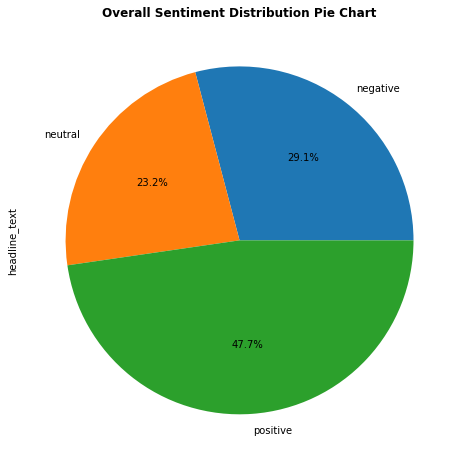

In [51]:
plt.figure(figsize=(8,8))
final_result['headline_text'].plot.pie(autopct='%1.1f%%')
plt.title("Overall Sentiment Distribution Pie Chart",fontweight="bold")
plt.show()

### Building the Hybrid Model

In [52]:
hybrid_data = pd.merge(left=df_num,right=text2,
                       left_on=df_num['Date'],
                       right_on=text2['publish_date'],
                       how='outer')

In [53]:
hybrid_data.head()

,key_0,Date,Open,High,Low,Close,Adj Close,Volume,publish_date,headline_category,headline_text,Result
0,2005-01-03,2005-01-03,65.095001,65.209999,63.570000,63.910000,50.853107,16062600.0,2005-01-03,business.india-business,sensex closes at new high of separate p...,positive
1,2005-01-04,2005-01-04,64.035004,64.084999,62.430000,62.540001,49.762993,27450000.0,2005-01-04,business.india-business,sensex will breach level in major c...,positive
2,2005-01-05,2005-01-05,62.470001,62.639999,61.290001,61.290001,48.768360,29884200.0,2005-01-05,business.india-business,low support from fii led to sensex crash,neutral
3,2005-01-06,2005-01-06,61.669998,62.200001,61.224998,61.615002,49.026966,23061200.0,2005-01-06,business.india-business,adc slashed cell tariffs to fall govt s help...,neutral
4,2005-01-07,2005-01-07,61.755001,61.950001,60.895000,60.930000,48.481922,20906200.0,2005-01-07,business.india-business,may sensex crash fm for revealing names s...,neutral


In [54]:
senti_data = pd.get_dummies(hybrid_data['Result'],drop_first=True)

hybrid_data = pd.concat([hybrid_data,senti_data],axis=1)

hybrid_data.head()

,key_0,Date,Open,High,Low,Close,Adj Close,Volume,publish_date,headline_category,headline_text,Result,neutral,positive
0,2005-01-03,2005-01-03,65.095001,65.209999,63.570000,63.910000,50.853107,16062600.0,2005-01-03,business.india-business,sensex closes at new high of separate p...,positive,0,1
1,2005-01-04,2005-01-04,64.035004,64.084999,62.430000,62.540001,49.762993,27450000.0,2005-01-04,business.india-business,sensex will breach level in major c...,positive,0,1
2,2005-01-05,2005-01-05,62.470001,62.639999,61.290001,61.290001,48.768360,29884200.0,2005-01-05,business.india-business,low support from fii led to sensex crash,neutral,1,0
3,2005-01-06,2005-01-06,61.669998,62.200001,61.224998,61.615002,49.026966,23061200.0,2005-01-06,business.india-business,adc slashed cell tariffs to fall govt s help...,neutral,1,0
4,2005-01-07,2005-01-07,61.755001,61.950001,60.895000,60.930000,48.481922,20906200.0,2005-01-07,business.india-business,may sensex crash fm for revealing names s...,neutral,1,0


### Adding subjectivity and polarity Scores to Textual Data

In [55]:
# Functions to get the subjectivity and polarity
def getSubjectivity(txt):
    return TextBlob(str(txt)).sentiment.subjectivity

def getPolarity(txt):
    return  TextBlob(str(txt)).sentiment.polarity

In [56]:
#Adding subjectivity and polarity columns
hybrid_data['Subjectivity'] = hybrid_data['headline_text'].apply(lambda x : getSubjectivity(x))
hybrid_data['Polarity'] = hybrid_data['headline_text'].apply(lambda x : getPolarity(x))
hybrid_data.head()

,key_0,Date,Open,High,Low,Close,Adj Close,Volume,publish_date,headline_category,headline_text,Result,neutral,positive,Subjectivity,Polarity
0,2005-01-03,2005-01-03,65.095001,65.209999,63.570000,63.910000,50.853107,16062600.0,2005-01-03,business.india-business,sensex closes at new high of separate p...,positive,0,1,0.359053,0.074091
1,2005-01-04,2005-01-04,64.035004,64.084999,62.430000,62.540001,49.762993,27450000.0,2005-01-04,business.india-business,sensex will breach level in major c...,positive,0,1,0.700000,0.431250
2,2005-01-05,2005-01-05,62.470001,62.639999,61.290001,61.290001,48.768360,29884200.0,2005-01-05,business.india-business,low support from fii led to sensex crash,neutral,1,0,0.300000,0.000000
3,2005-01-06,2005-01-06,61.669998,62.200001,61.224998,61.615002,49.026966,23061200.0,2005-01-06,business.india-business,adc slashed cell tariffs to fall govt s help...,neutral,1,0,0.000000,0.000000
4,2005-01-07,2005-01-07,61.755001,61.950001,60.895000,60.930000,48.481922,20906200.0,2005-01-07,business.india-business,may sensex crash fm for revealing names s...,neutral,1,0,0.000000,0.000000


### Visualizing the polarity and Subjectivity scores

<AxesSubplot:title={'center':'News Polarity'}>

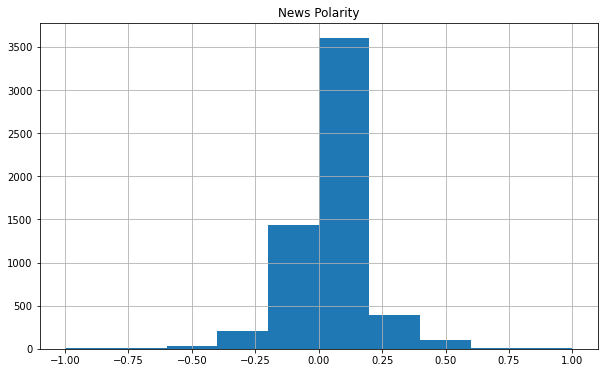

In [57]:
plt.figure(figsize = (10,6))
plt.title('News Polarity')
hybrid_data['Polarity'].hist()

<AxesSubplot:title={'center':'News Subjectivity'}>

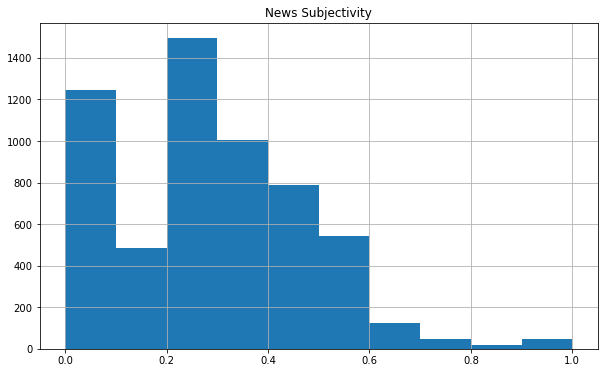

In [58]:
plt.figure(figsize = (10,6))
plt.title('News Subjectivity')
hybrid_data['Subjectivity'].hist()

### Performing Sentiment Analysis over Headlines of Hybrid Data

In [59]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [60]:
# Adding sentiment score to news
senti_int_an = SentimentIntensityAnalyzer()

hybrid_data['Compound'] = [senti_int_an.polarity_scores(str(v))['compound'] for v in hybrid_data['headline_text']]
hybrid_data['Negative'] = [senti_int_an.polarity_scores(str(v))['neg'] for v in hybrid_data['headline_text']]
hybrid_data['Neutral'] = [senti_int_an.polarity_scores(str(v))['neu'] for v in hybrid_data['headline_text']]
hybrid_data['Positive'] = [senti_int_an.polarity_scores(str(v))['pos'] for v in hybrid_data['headline_text']]
hybrid_data.head()

,key_0,Date,Open,High,Low,Close,Adj Close,Volume,publish_date,headline_category,headline_text,Result,neutral,positive,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,2005-01-03,2005-01-03,65.095001,65.209999,63.570000,63.910000,50.853107,16062600.0,2005-01-03,business.india-business,sensex closes at new high of separate p...,positive,0,1,0.359053,0.074091,0.0000,0.000,1.000,0.000
1,2005-01-04,2005-01-04,64.035004,64.084999,62.430000,62.540001,49.762993,27450000.0,2005-01-04,business.india-business,sensex will breach level in major c...,positive,0,1,0.700000,0.431250,0.0000,0.000,1.000,0.000
2,2005-01-05,2005-01-05,62.470001,62.639999,61.290001,61.290001,48.768360,29884200.0,2005-01-05,business.india-business,low support from fii led to sensex crash,neutral,1,0,0.300000,0.000000,-0.2732,0.384,0.400,0.216
3,2005-01-06,2005-01-06,61.669998,62.200001,61.224998,61.615002,49.026966,23061200.0,2005-01-06,business.india-business,adc slashed cell tariffs to fall govt s help...,neutral,1,0,0.000000,0.000000,0.4215,0.097,0.749,0.154
4,2005-01-07,2005-01-07,61.755001,61.950001,60.895000,60.930000,48.481922,20906200.0,2005-01-07,business.india-business,may sensex crash fm for revealing names s...,neutral,1,0,0.000000,0.000000,-0.4019,0.252,0.748,0.000


In [61]:
hybrid_data.columns

Index(['key_0', 'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'publish_date', 'headline_category', 'headline_text', 'Result',
       'neutral', 'positive', 'Subjectivity', 'Polarity', 'Compound',
       'Negative', 'Neutral', 'Positive'],
      dtype='object')

In [62]:
new_hybrid = hybrid_data[[ 'Open',  'High', 'Low','Close','Volume','Compound', 'Negative', 'Neutral' ,'Positive','positive']]
new_hybrid.reset_index(inplace = True)

In [63]:
new_hybrid.rename(columns = {'positive':'Label'}, inplace = True)
new_hybrid.head()

,index,Open,High,Low,Close,Volume,Compound,Negative,Neutral,Positive,Label
0,0,65.095001,65.209999,63.570000,63.910000,16062600.0,0.0000,0.000,1.000,0.000,1
1,1,64.035004,64.084999,62.430000,62.540001,27450000.0,0.0000,0.000,1.000,0.000,1
2,2,62.470001,62.639999,61.290001,61.290001,29884200.0,-0.2732,0.384,0.400,0.216,0
3,3,61.669998,62.200001,61.224998,61.615002,23061200.0,0.4215,0.097,0.749,0.154,0
4,4,61.755001,61.950001,60.895000,60.930000,20906200.0,-0.4019,0.252,0.748,0.000,0


In [64]:
new_hybrid.shape

(5800, 11)

### Building Model

In [65]:
X = new_hybrid.drop('Label', axis=1)    
y = new_hybrid['Label']

In [66]:
X = X.fillna(X.mean())

In [67]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

In [68]:
x_train.shape , y_train.shape

((4640, 10), (4640,))

In [69]:
x_test.shape , y_test.shape

((1160, 10), (1160,))

In [70]:
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

### DecisionTreeClassifier

In [71]:
# Setup the pipeline
steps = [('scaler',StandardScaler()),
         ('dt',DecisionTreeClassifier())]

pipeline = Pipeline(steps)

# Specify the hyperparameter
params = {'dt__criterion':['gini', 'entropy'],
          'dt__max_depth':[4,6,8,10,12],
          'dt__min_samples_leaf':[.1,.5,1,1.5],
          'dt__max_features':['auto', 'sqrt', 'log2']}

# Instantiate the GridSearchCV
cv = GridSearchCV(pipeline,params,cv=3)

# Fit to the training set
cv.fit(x_train,y_train)

# Predict the labels of the test set: y_pred
y_pred = cv.predict(x_test)

# Compute and print metrics
print("Accuracy: {:.2f}%".format(accuracy_score(y_test,y_pred)*100))
print("Tuned Model Parameters: {}".format(cv.best_params_))

Accuracy: 67.07%
Tuned Model Parameters: {'dt__criterion': 'entropy', 'dt__max_depth': 10, 'dt__max_features': 'log2', 'dt__min_samples_leaf': 0.1}


### LogisticRegression

In [72]:
# Setup the pipeline
steps = [('scaler',StandardScaler()),
         ('log_reg',LogisticRegression())]

pipeline = Pipeline(steps)

# Specify the hyperparameter
params = {'log_reg__penalty':['l1', 'l2','elasticnet'],
          'log_reg__solver':['lbfgs', 'liblinear']}

# Instantiate the GridSearchCV
cv = GridSearchCV(pipeline,params,cv=5)

# Fit to the training set
cv.fit(x_train,y_train)

# Predict the labels of the test set: y_pred
y_pred = cv.predict(x_test)

# Compute and print metrics
print("Accuracy: {:.2f}%".format(accuracy_score(y_test,y_pred)*100))
print("Tuned Model Parameters: {}".format(cv.best_params_))

Accuracy: 64.14%
Tuned Model Parameters: {'log_reg__penalty': 'l2', 'log_reg__solver': 'lbfgs'}


### RandomForestClassifier

In [73]:
# Setup the pipeline
steps = [('scaler', StandardScaler()),
         ('rnd', RandomForestClassifier())]

pipeline = Pipeline(steps)

# Specify the hyperparameter
parameters = {'rnd__criterion' :['gini','entropy'],
              'rnd__n_estimators':[100,200,300],
              'rnd__max_depth':range(2,12),
              'rnd__max_features':['auto', 'sqrt', 'log2']}

# Instantiate the GridSearchCV
cv = GridSearchCV(pipeline,parameters,cv=3)

# Fit to the training set
cv.fit(x_train,y_train)

# Predict the labels of the test set: y_pred
y_pred = cv.predict(x_test)

# Compute and print metrics
print("Accuracy: {:.2f}%".format(accuracy_score(y_test,y_pred)*100))
print("Tuned Model Parameters: {}".format(cv.best_params_))

Accuracy: 70.69%
Tuned Model Parameters: {'rnd__criterion': 'gini', 'rnd__max_depth': 7, 'rnd__max_features': 'sqrt', 'rnd__n_estimators': 200}


### GradientBoostingClassifier

In [74]:
# Setup the pipeline
steps = [('scaler', StandardScaler()),
         ('xgb', GradientBoostingClassifier())]

pipeline = Pipeline(steps)

# Specify the hyperparameter
parameters = {'xgb__n_estimators':[100,200,300],
              'xgb__max_depth':range(2,12),
              'xgb__criterion':['friedman_mse', 'mse', 'mae']}

# Instantiate the GridSearchCV
cv = GridSearchCV(pipeline,parameters,cv=3)

# Fit to the training set
cv.fit(x_train,y_train)

# Predict the labels of the test set: y_pred
y_pred = cv.predict(x_test)

# Compute and print metrics
print("Accuracy: {:.2f}%".format(accuracy_score(y_test,y_pred)*100))
print("Tuned Model Parameters: {}".format(cv.best_params_))

KeyboardInterrupt: 

In [ ]:
xgb = GradientBoostingClassifier(n_estimators=200,criterion=mse,max_depth)
xgb.fit(x_train, y_train)
y_xgb_pred = xgb.predict(x_test)
accuracy_score(y_test,y_xgb_pred)

### Conclusion the best model is `RandomForestClassifier`